In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('stage_1_train.csv')
num_labels = len(data)
num_positive = 0
num_negative = 0



for i in data['Label']:
    if int(i) == 1:
        num_positive = num_positive + 1
    elif int(i) == 0:
        num_negative = num_negative + 1
    else:
        print(str(i) + 'neither')

In [52]:
print('Total: ' + str(num_labels))
print('Positive: ' + str(num_positive))
print('Negative: ' + str(num_negative))

Total: 4045572
Positive: 230812
Negative: 3814760


In [ ]:
sub_types = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']

In [21]:
sub_pos_neg = []
for i in sub_types:
    sub_pos_neg.extend([i + '_positive', i + '_negative'])
sub_pos_neg_counts = dict(zip(sub_pos_neg, [0,0,0,0,0,0,0,0,0,0,0,0]))

{'epidural_positive': 0,
 'epidural_negative': 0,
 'intraparenchymal_positive': 0,
 'intraparenchymal_negative': 0,
 'intraventricular_positive': 0,
 'intraventricular_negative': 0,
 'subarachnoid_positive': 0,
 'subarachnoid_negative': 0,
 'subdural_positive': 0,
 'subdural_negative': 0,
 'any_positive': 0,
 'any_negative': 0}

In [18]:
all_ids = []
for i in range(len(data['ID'])):
    if i % 6 == 0:
        all_ids.append(str(data.iloc[i, 0])[3:12])

len(all_ids)
            

674262

In [109]:
total_neg = 0
total_pos = 0


for i in range(len(data['ID'])):
    if i % 6 == 0:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['epidural_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['epidural_negative'] += 1
            total_neg += 1
    elif i % 6 == 1:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['intraparenchymal_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['intraparenchymal_negative'] += 1
            total_neg += 1
    elif i % 6 == 2:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['intraventricular_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['intraventricular_negative'] += 1
            total_neg += 1
    elif i % 6 == 3:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['subarachnoid_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['subarachnoid_negative'] += 1
            total_neg += 1
    elif i % 6 == 4:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['subdural_positive'] += 1
            total_pos += 1
        else:
            sub_pos_neg_counts['subdural_negative'] += 1
            total_neg += 1
    elif i % 6 == 5:
        if int(data.iloc[i, 1]) == 1:
            sub_pos_neg_counts['any_positive'] += 1
            total_pos +=1
        else:
            sub_pos_neg_counts['any_negative'] += 1
            total_neg += 1
    else:
        print('mistake')



In [110]:
sub_pos_neg_counts

{'epidural_positive': 22515,
 'epidural_negative': 5481358,
 'intraparenchymal_positive': 265877,
 'intraparenchymal_negative': 5237996,
 'intraventricular_positive': 193996,
 'intraventricular_negative': 5309877,
 'subarachnoid_positive': 262279,
 'subarachnoid_negative': 5241594,
 'subdural_positive': 346982,
 'subdural_negative': 5156891,
 'any_positive': 792687,
 'any_negative': 4711186}

In [111]:
total_neg = 0
for i in range(len(sub_pos_neg_counts.values())-2):
    if i % 2 == 1:
        total_neg += list(sub_pos_neg_counts.values())[i]
total_neg

26427716

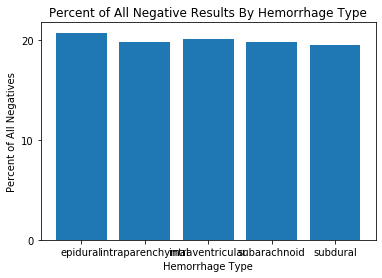

<Figure size 720x720 with 0 Axes>

In [112]:
pos = []
neg = []

for i, k in sub_pos_neg_counts.items():
    if i[-8:] == 'positive':
        pos.append((k / sub_pos_neg_counts['any_positive'])*100)
    else:
        neg.append((k / total_neg)*100)



negative = plt.bar(np.arange(5), neg[:5])

plt.ylabel('Percent of All Negatives')
plt.xlabel('Hemorrhage Type')
plt.title('Percent of All Negative Results By Hemorrhage Type')
plt.xticks(np.arange(5), sub_types[:5])
plt.yticks(np.arange(0, 30, 10))
plt.figure(figsize=(10,10))

plt.show()

[2.8403392511798478, 33.5412338035063, 24.473215783783512, 33.08733459738838, 43.7728889208477]


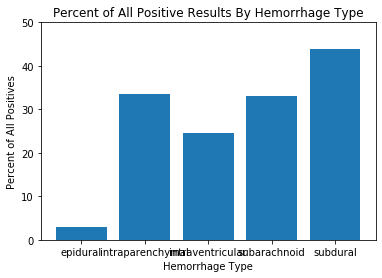

In [117]:
positive = plt.bar(np.arange(5), pos[:5])
print(pos[:5])

plt.ylabel('Percent of All Positives')
plt.xlabel('Hemorrhage Type')
plt.title('Percent of All Positive Results By Hemorrhage Type')
plt.xticks(np.arange(5), sub_types[:5])
plt.yticks(np.arange(0, 60, 10))

plt.show()

In [38]:
print(list(sub_pos_neg_counts.keys())[1][-8:])

negative
